In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alizamalik","key":"cdc367201afe422cd87dcce4762a1b6d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d vivek468/superstore-dataset-final

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
  0% 0.00/550k [00:00<?, ?B/s]
100% 550k/550k [00:00<00:00, 855MB/s]


In [ ]:
!ls

'kaggle (1).json'   kaggle.json   sample_data   superstore-dataset-final.zip


In [ ]:
!rm "kaggle (1).json"

In [ ]:
!unzip superstore-dataset-final.zip


Archive:  superstore-dataset-final.zip
  inflating: Sample - Superstore.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


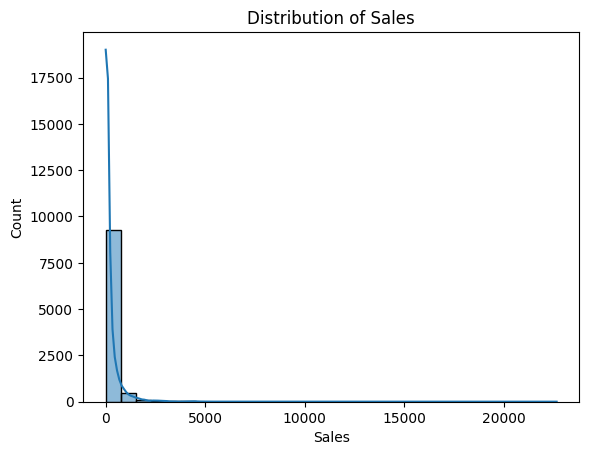

In [ ]:
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.show()

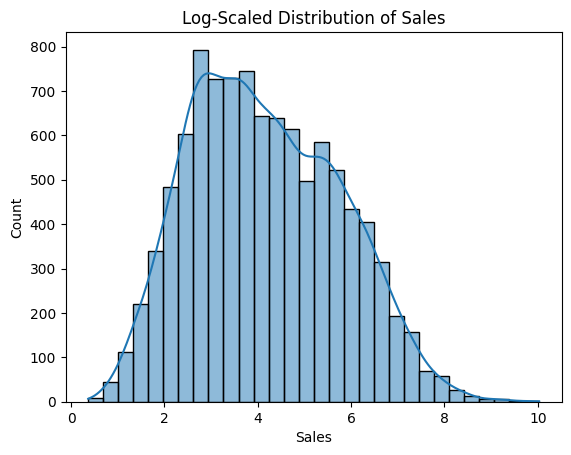

In [ ]:
sns.histplot(np.log1p(df['Sales']), bins=30, kde=True)
plt.title("Log-Scaled Distribution of Sales")
plt.show()


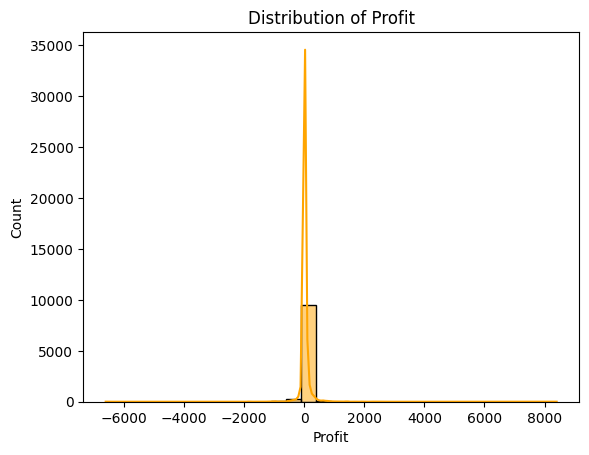

In [ ]:
sns.histplot(df['Profit'], bins=30, kde=True, color='orange')
plt.title("Distribution of Profit")
plt.show()


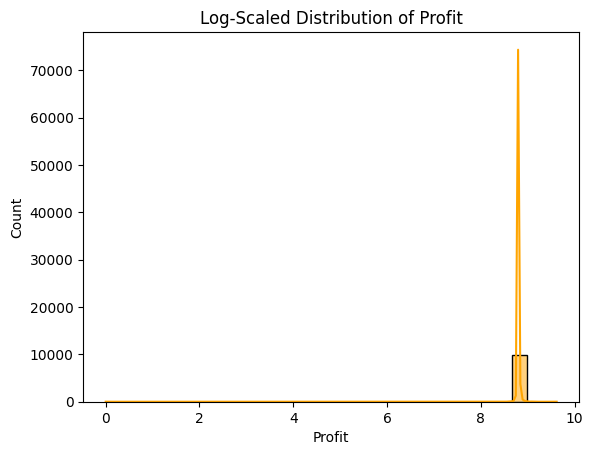

In [ ]:

sns.histplot(np.log1p(df['Profit'] - df['Profit'].min()), bins=30, kde=True, color='orange')
plt.title("Log-Scaled Distribution of Profit")
plt.show()


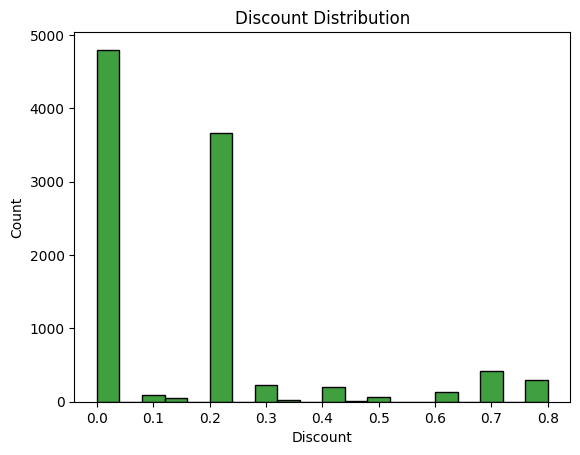

In [ ]:
sns.histplot(df['Discount'], bins=20, kde=False, color='green')
plt.title("Discount Distribution")
plt.show()

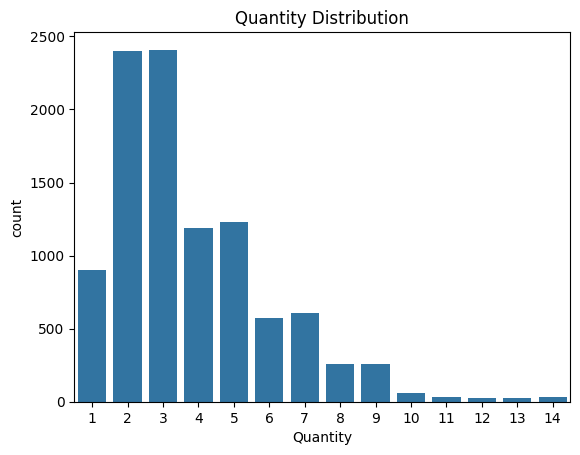

In [ ]:
sns.countplot(x='Quantity', data=df)
plt.title("Quantity Distribution")
plt.show()

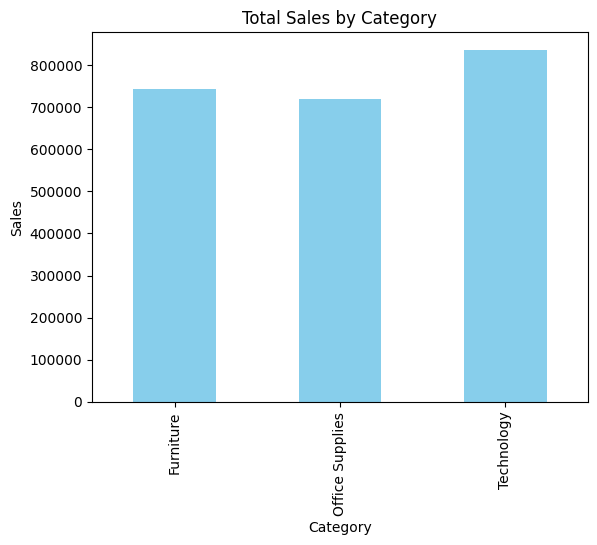

In [ ]:
df.groupby('Category')['Sales'].sum().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.show()

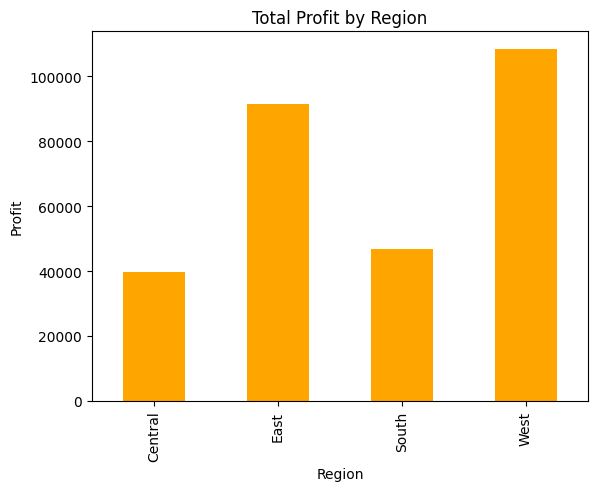

In [ ]:
df.groupby('Region')['Profit'].sum().plot(kind='bar', color='orange')
plt.title("Total Profit by Region")
plt.ylabel("Profit")
plt.show()

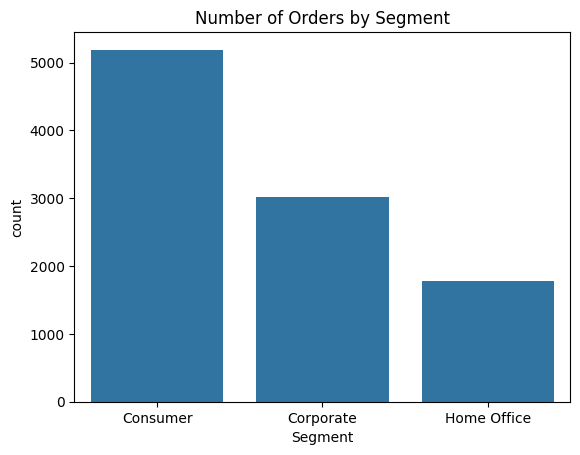

In [ ]:
sns.countplot(x='Segment', data=df)
plt.title("Number of Orders by Segment")
plt.show()

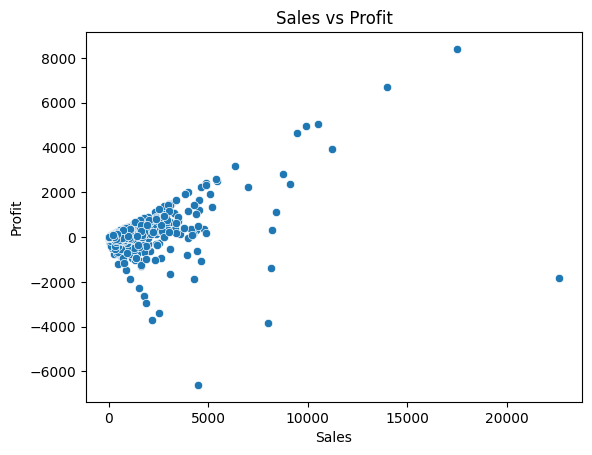

In [ ]:
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()

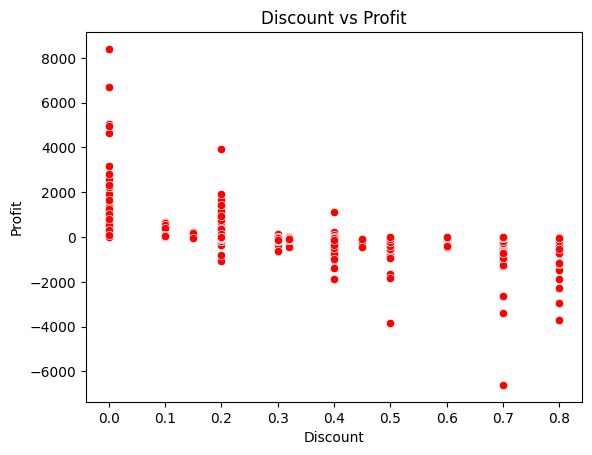

In [ ]:
sns.scatterplot(x='Discount', y='Profit', data=df, color='red')
plt.title("Discount vs Profit")
plt.show()

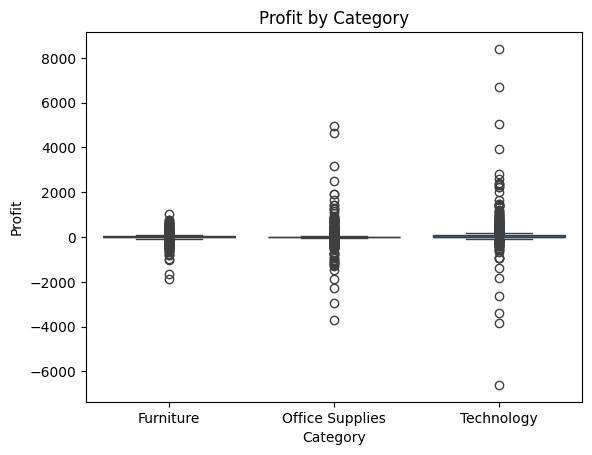

In [ ]:
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit by Category")
plt.show()

In [ ]:
df['Month'] = df['Order Date'].dt.to_period('M')

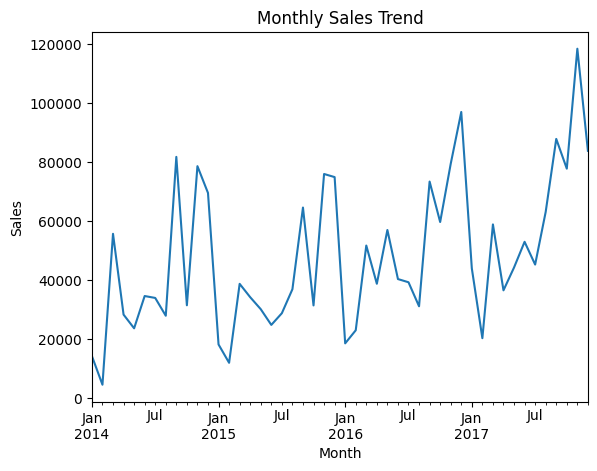

In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum(); monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()

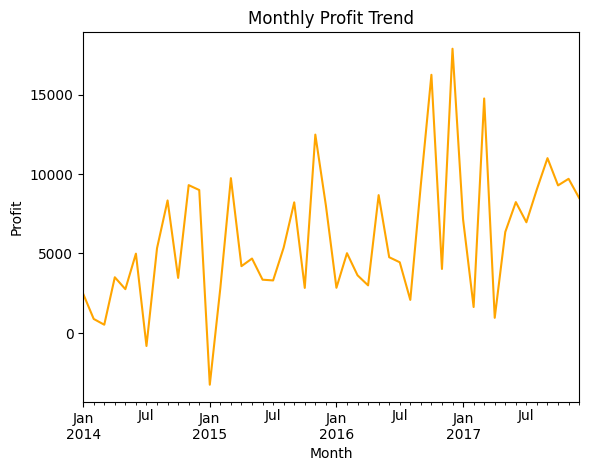

In [ ]:
monthly_profit = df.groupby('Month')['Profit'].sum()
monthly_profit.plot(color='orange')
plt.title("Monthly Profit Trend")
plt.ylabel("Profit")
plt.show()

In [ ]:
df.to_csv("Superstore_EDA_Cleaned.csv", index=False)
